<a href="https://colab.research.google.com/github/rosemilca-Ing/Master_II/blob/deep_learning/Projet_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pseudo-Label : Semi-Supervised Learning method for Deep Neural Networks**

# **Prédiction des données MNIST avec uniquement 100 labels**

# **Exploration des données**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

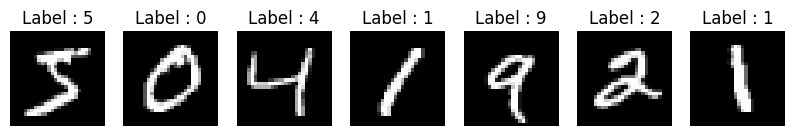

In [ ]:
random.seed(42)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
number = 7
plt.figure(figsize=(10, 2))
for i in range(number):
    plt.subplot(1, number, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label : {y_train[i]}")
    plt.axis('off')

plt.show()

In [ ]:
print("Nombre total d'images d'entraînement : ",  len(x_train))
print("Nombre total d'images de test : ",  len(x_test))
print("Forme d'une image : ", x_train[0].shape)
print("Labels uniques : ", np.unique(y_train))

Nombre total d'images d'entraînement :  60000
Nombre total d'images de test :  10000
Forme d'une image :  (28, 28)
Labels uniques :  [0 1 2 3 4 5 6 7 8 9]


# **Methode I (DNN + Pseudo-Label)**

***ref:*** https://medium.com/analytics-vidhya/implementing-a-deep-neural-network-from-scratch-8ed9988d2e4d

https://www.datacamp.com/tutorial/introduction-to-deep-neural-networks

## **Implémentation du modèle DNN**

In [ ]:
random.seed(42)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Aplatir et normaliser
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Selection de 100 examples labelisés
labeled_indices = np.random.choice(len(x_train), size=100, replace=False)
x_labeled = x_train[labeled_indices]
y_labeled = y_train[labeled_indices]

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


https://khayyam.developpez.com/articles/intelligence-artificielle/tensorflow/

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_labeled, y_labeled, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 2.3117 - accuracy: 0.1000
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 2.0567 - accuracy: 0.4200
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 1.8443 - accuracy: 0.6200
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 1.6220 - accuracy: 0.6400
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 1.3905 - accuracy: 0.6800
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 1.1556 - accuracy: 0.7300
Epoch 7/10
4/4 [==============================] - 0s 6ms/step - loss: 0.9322 - accuracy: 0.7800
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 0.7197 - accuracy: 0.9000
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.5352 - accuracy: 0.9600
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.3951 - accuracy: 0.9500


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.1300 - accuracy: 0.6224 - 671ms/epoch - 2ms/step


In [ ]:
files = ["zero.png", "one.png", "two.png", "three.png", "four.png", "five.png", "six.png", "seven.png"]
for file in files:
    img = load_img(file, color_mode='grayscale')
    x = img_to_array(img)
    x = x.reshape(1, -1) / 255.0
    y = model.predict(x)
    predicted_class = np.argmax(y, axis=-1)

    print(file + " => " + str(predicted_class[0]) + "\n")

1/1 [==============================] - 0s 64ms/step
zero.png => 5

1/1 [==============================] - 0s 24ms/step
one.png => 7

1/1 [==============================] - 0s 19ms/step
two.png => 1

1/1 [==============================] - 0s 24ms/step
three.png => 5

1/1 [==============================] - 0s 25ms/step
four.png => 6

1/1 [==============================] - 0s 21ms/step
five.png => 5

1/1 [==============================] - 0s 23ms/step
six.png => 5

1/1 [==============================] - 0s 20ms/step
seven.png => 8



**Commentaires:** Le modèle prédit peu d'imagescorrectement

## **Pseudo-Label**

In [ ]:
# Selection 59 900  examples unlabelisés
unlabeled_indices = np.delete(np.arange(len(x_train)), labeled_indices)
x_unlabeled = x_train[unlabeled_indices]

In [ ]:
pseudo_labels = model.predict(x_unlabeled)
pseudo_labels = np.argmax(pseudo_labels, axis=1)
pseudo_labels = to_categorical(pseudo_labels, 10)

1872/1872 [==============================] - 5s 2ms/step


In [ ]:
# Combine labelisés and pseudo-labeled
combined_x = np.concatenate([x_labeled, x_unlabeled], axis=0)
combined_y = np.concatenate([y_labeled, pseudo_labels], axis=0)

In [ ]:
# Train sur  data combinés
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(combined_x, combined_y, epochs=1,  shuffle=True)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.2560 - accuracy: 0.9007


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 2.8258 - accuracy: 0.6208 - 675ms/epoch - 2ms/step


# **Methode II : DropOut et Pseudo Label**

## **DropOut**

In [ ]:
random.seed(42)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
labeled_indices = np.random.choice(len(x_train), size=100, replace=False)
x_labeled = x_train[labeled_indices]
y_labeled = y_train[labeled_indices]


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)              

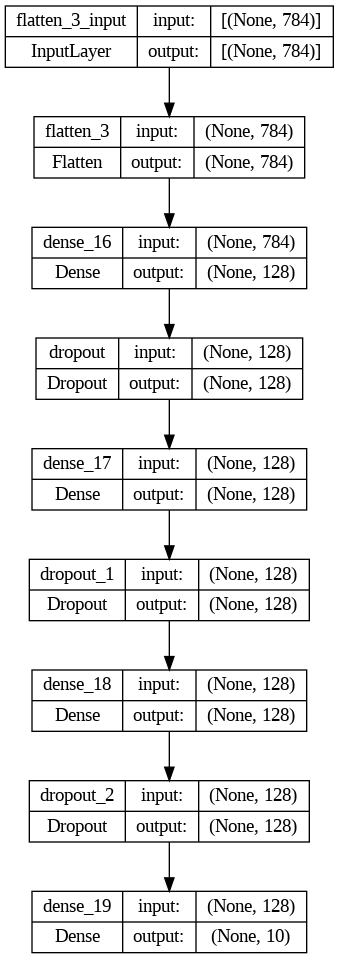

In [ ]:
tf.keras.utils.plot_model(model, to_file='model_big.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_labeled, y_labeled, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 2.4521 - accuracy: 0.0600
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 2.3680 - accuracy: 0.1300
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 2.3279 - accuracy: 0.0700
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 2.2384 - accuracy: 0.1300
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 2.2162 - accuracy: 0.2000
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 2.1750 - accuracy: 0.1400
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 2.2413 - accuracy: 0.1300
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 2.1213 - accuracy: 0.2400
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 2.1165 - accuracy: 0.2200
Epoch 10/10
4/4 [==============================] - 0s 6ms/step - loss: 2.0986 - accuracy: 0.2300


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 2.1142 - accuracy: 0.4030 - 662ms/epoch - 2ms/step


In [ ]:
files = ["zero.png", "one.png", "two.png", "three.png", "four.png", "five.png", "six.png", "seven.png"]
for file in files:
    img = load_img(file, color_mode='grayscale')
    x = img_to_array(img)
    x = x.reshape(1, -1) / 255.0
    y = model.predict(x)
    predicted_class = np.argmax(y, axis=-1)

    print(file + " => " + str(predicted_class[0]) + "\n")

1/1 [==============================] - 0s 67ms/step
zero.png => 3

1/1 [==============================] - 0s 23ms/step
one.png => 8

1/1 [==============================] - 0s 20ms/step
two.png => 8

1/1 [==============================] - 0s 22ms/step
three.png => 3

1/1 [==============================] - 0s 21ms/step
four.png => 0

1/1 [==============================] - 0s 28ms/step
five.png => 9

1/1 [==============================] - 0s 22ms/step
six.png => 3

1/1 [==============================] - 0s 25ms/step
seven.png => 8



## **Pseudo-Label**

In [ ]:
unlabeled_indices = np.delete(np.arange(len(x_train)), labeled_indices)
x_unlabeled = x_train[unlabeled_indices]

In [ ]:
pseudo_labels = model.predict(x_unlabeled)
pseudo_labels = np.argmax(pseudo_labels, axis=1)
pseudo_labels = to_categorical(pseudo_labels, 10)

1872/1872 [==============================] - 4s 2ms/step


In [ ]:
combined_x = np.concatenate([x_labeled, x_unlabeled], axis=0)
combined_y = np.concatenate([y_labeled, pseudo_labels], axis=0)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(combined_x, combined_y, epochs=1,  shuffle=True)

1875/1875 [==============================] - 11s 5ms/step - loss: 0.7581 - accuracy: 0.7400


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 5.1563 - accuracy: 0.4212 - 666ms/epoch - 2ms/step


# **Methode III : Denoising AutoEncodeur + Pseudo Label**

## **Denoising AutoEncodeur**

In [ ]:
random.seed(42)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
labeled_indices = np.random.choice(len(x_train), size=100, replace=False)
x_labeled = x_train[labeled_indices]
y_labeled = y_train[labeled_indices]


In [ ]:
unlabeled_indices = np.delete(np.arange(len(x_train)), labeled_indices)
x_unlabeled = x_train[unlabeled_indices]

ref : https://www.kaggle.com/code/manohar676/binary-classification-using-mlp-autoencoder

In [ ]:
input_size = 784
encoding_dim = 128
input_img = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(input_size, activation='sigmoid')(encoded)
dae = Model(input_img, decoded)

dae.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 784)               101136    
                                                                 
Total params: 218128 (852.06 KB)
Trainable params: 218128 (852.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
dae.compile(optimizer='adam', loss='binary_crossentropy')

ref : https://pyimagesearch.com/2020/02/24/denoising-autoencoders-with-keras-tensorflow-and-deep-learning/

In [ ]:
trainNoise = np.random.normal(loc=0.5, scale=0.5, size=x_labeled.shape)
#testNoise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)

trainXNoisy = np.clip(x_labeled + trainNoise, 0, 1)
#testXNoisy = np.clip(x_test + testNoise, 0, 1)

In [ ]:
history = dae.fit(trainXNoisy, x_labeled, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 7ms/step - loss: 0.6806
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 0.5898
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 0.4554
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.3561
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 0.3088
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.2873
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.2785
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 0.2751
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.2726
Epoch 10/10
4/4 [==============================] - 0s 7ms/step - loss: 0.2702


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
encoded_data = dae.predict(x_unlabeled)

1872/1872 [==============================] - 6s 3ms/step


In [ ]:
max_probabilities = np.max(encoded_data, axis=1)

In [ ]:
pred_one_hot = to_categorical(max_probabilities, num_classes=10)

In [ ]:
combined_x = np.concatenate([x_labeled, x_unlabeled], axis=0)
combined_y = np.concatenate([y_labeled, pred_one_hot], axis=0)

In [ ]:
model.fit(combined_x, combined_y, epochs=1,  shuffle=True)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0256 - accuracy: 0.9979


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 13.2859 - accuracy: 0.0980 - 546ms/epoch - 2ms/step
